In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from MSquared_methods import remove_wings
from scipy.integrate import trapezoid

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

In [22]:
df = pd.read_csv("Data/RedDiode_Spectrum.txt", sep=";", decimal=',')

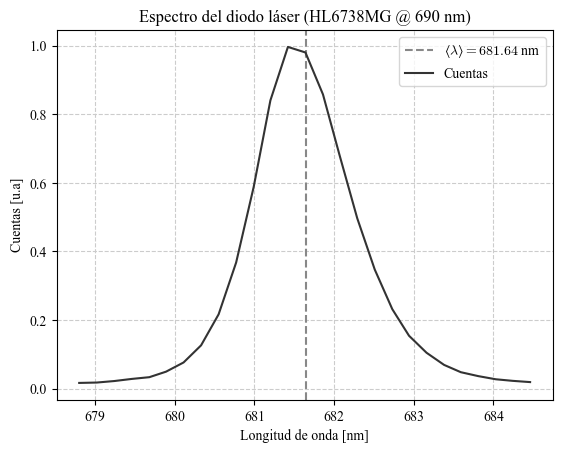

In [53]:
wavelength = np.array(pd.to_numeric(df["Wavelength"]))
counts = np.array(pd.to_numeric(df["Raw data #1"]))
counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

counts, left_limit, right_limit = remove_wings(counts, kernel_length=10, comparison_length=10, error=2.5E-3)
wavelength = wavelength[left_limit:right_limit]
Z = trapezoid(counts, dx=wavelength[1] - wavelength[0]) 
peak_wavelength = trapezoid(wavelength * counts / Z, dx=wavelength[1] - wavelength[0]) 

fig, ax = plt.subplots()
ax.axvline(peak_wavelength, color="#888", ls='--', label=f"$⟨\lambda⟩ = {peak_wavelength:.2f}$ nm")
title = "Espectro del diodo láser (HL6738MG @ 690 nm)"
ax.set(title=title, xlabel="Longitud de onda [nm]", ylabel="Cuentas [u.a]")
ax.plot(wavelength, counts, color="#333", label="Cuentas")
ax.grid(True, color="#ccc", ls="--")
ax.legend()
plt.savefig("Figures/spectrum.png", dpi=200)